# Merge DataFrames

### Load two tables

In [1]:
import pandas as pd

df_generation = pd.read_csv('data/generation.csv')
df_price = pd.read_csv('data/price_spot.csv')

## Merge data frames based on common column

In [2]:
df = df_generation.merge(df_price, on='datetime')
df

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
5115,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875


## Multivariate analysis

For example, a correlation heatmap with seaborn.

In [3]:
df.set_index('datetime', inplace=True)
df

,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
datetime,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875


In [4]:
dfc = df.corr().mul(100)
dfc

,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
Hidráulica,100.000000,96.295706,-96.715749,-0.125120,97.852284,-97.372307,98.034308,97.969434,98.119835,98.016468,-1.229759,-96.362723,-97.562248,-7.419561,-6.911661,96.753675,7.323945,98.176186,-0.659570
Ajuste P48,96.295706,100.000000,-94.861987,3.452885,98.360243,-98.337879,98.465198,98.451853,98.355424,98.281748,-5.400940,-96.073074,-98.570097,-3.666302,-3.978077,97.254114,-5.282027,98.466914,-3.724692
Saldo Andorra,-96.715749,-94.861987,100.000000,-1.245735,-96.241182,96.285971,-96.620853,-96.650376,-96.617676,-96.559953,1.178104,95.635348,96.557067,1.438527,-3.097410,-95.391550,0.840097,-96.830394,0.524520
Saldo Marruecos,-0.125120,3.452885,-1.245735,100.000000,1.403681,-1.283871,1.974433,1.871914,2.376493,1.878915,-2.048912,1.206324,-3.110389,-28.274989,-28.456598,-0.108760,-19.481177,1.943144,-11.316183
Saldo Francia,97.852284,98.360243,-96.241182,1.403681,100.000000,-99.762635,99.849038,99.832777,99.815387,99.655985,-5.120780,-97.553519,-99.631561,-1.396790,-1.381835,98.712787,-1.761457,99.791027,-4.054147
Saldo Portugal,-97.372307,-98.337879,96.285971,-1.283871,-99.762635,100.000000,-99.865362,-99.863432,-99.725715,-99.619698,3.983759,97.726480,99.714104,-1.375648,-1.425760,-99.034590,3.550457,-99.835264,2.505427
otras renovables,98.034308,98.465198,-96.620853,1.974433,99.849038,-99.865362,100.000000,99.978432,99.911151,99.797274,-3.553802,-97.748578,-99.743676,-1.404140,-1.439956,99.070563,-1.561385,99.972176,-2.233918
Residuos no renovables,97.969434,98.451853,-96.650376,1.871914,99.832777,-99.863432,99.978432,100.000000,99.877332,99.791587,-3.420056,-97.828717,-99.761627,-1.135027,-1.218712,99.060314,-1.644772,99.970436,-2.341595
Cogeneración,98.119835,98.355424,-96.617676,2.376493,99.815387,-99.725715,99.911151,99.877332,100.000000,99.744394,-4.431906,-97.471561,-99.631882,-2.427609,-1.935755,98.841219,-1.285075,99.849898,-3.987057
Eólica,98.016468,98.281748,-96.559953,1.878915,99.655985,-99.619698,99.797274,99.791587,99.744394,100.000000,-6.006733,-98.003247,-99.695178,-3.203812,-2.881657,98.343411,-1.317546,99.799828,-3.747205


<Axes: >

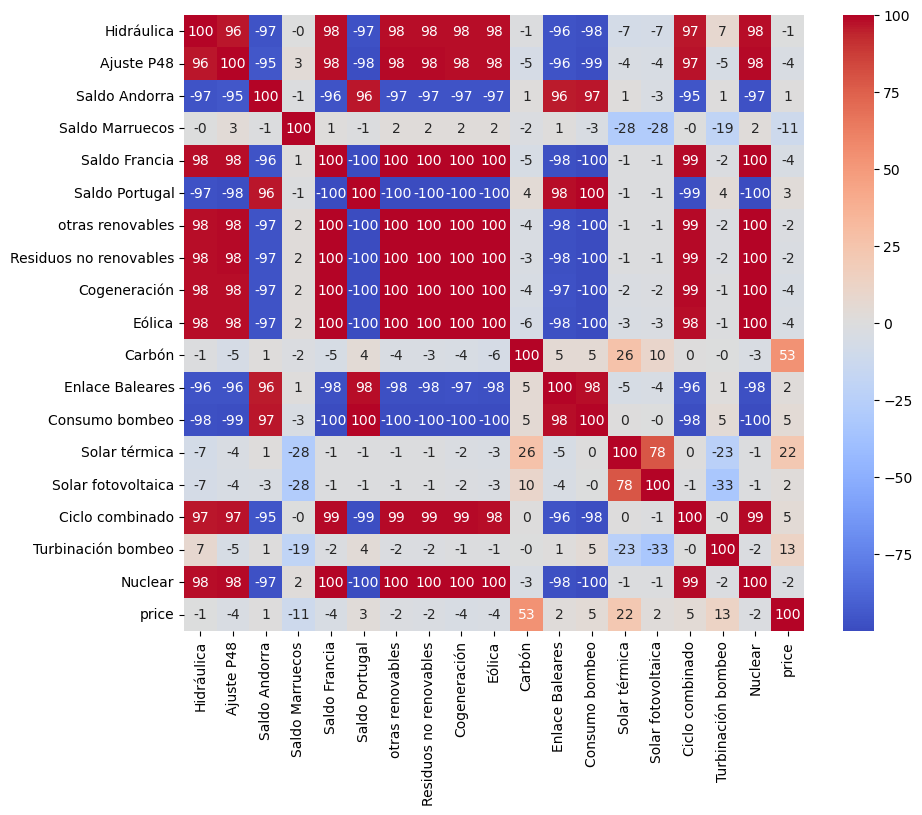

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dfc, annot=True, fmt=".0f", cmap='coolwarm', center=0)

In [6]:
columns = ['Saldo Marruecos', 'Turbinación bombeo', 'Carbón']
dfr = df[columns].corr()
dfr

,Saldo Marruecos,Turbinación bombeo,Carbón
Saldo Marruecos,1.000000,-0.194812,-0.020489
Turbinación bombeo,-0.194812,1.000000,-0.004219
Carbón,-0.020489,-0.004219,1.000000


In [7]:
import plotly.express as px
px.scatter_matrix(df[columns])

## Merge types

![](src/Miro%20Medium%20Image.png)

### Left

In [8]:
df_generation.merge(df_price, on='datetime', how='left')

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-01-01 00:00:00,2171.600,0.0,-44.00,33.0,3330.000,-761.100,584.100,312.500,1742.800,6380.800,810.0,-40.8,-1243.000,10.0,7.100,1885.400,50.000,6096.7,NaN
1,2022-01-01 01:00:00,2075.100,100.0,-42.00,133.0,3330.000,-1673.800,572.900,313.900,1729.100,6563.300,815.0,-40.8,-1688.000,10.0,19.100,1948.800,0.000,6098.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.0,-153.0,-2085.000,0.0,1.400,1640.000,420.075,6764.0,22.80500
8738,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.0,-25.5,-857.175,0.0,0.075,512.683,0.000,1680.2,25.82875


### Right

In [9]:
df_generation.merge(df_price, on='datetime', how='right')

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.0,-300.0,1150.0,-994.3,583.2,293.6,2710.4,3488.900,1144.375,-40.8,0.0,630.025,0.1,8649.10,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.0,0.0,1150.0,-1240.0,581.6,295.0,2651.0,3457.925,1078.675,-40.8,0.0,627.500,0.1,8204.15,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,2023-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.05125
9481,2023-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.47750


### Outer

In [10]:
df_generation.merge(df_price, on='datetime', how='outer')

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-01-01 00:00:00,2171.6,0.0,-44.0,33.0,3330.0,-761.1,584.1,312.5,1742.8,6380.8,810.0,-40.8,-1243.0,10.0,7.1,1885.4,50.0,6096.7,NaN
1,2022-01-01 01:00:00,2075.1,100.0,-42.0,133.0,3330.0,-1673.8,572.9,313.9,1729.1,6563.3,815.0,-40.8,-1688.0,10.0,19.1,1948.8,0.0,6098.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,2023-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.05125
13104,2023-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.47750


### Inner

In [11]:
df_generation.merge(df_price, on='datetime', how='inner')

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
5115,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875
